In [21]:
!pip install catboost

In [22]:
#required modules
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [23]:
#reading the data
data=pd.read_csv('clean_data.csv')
df=pd.DataFrame(data)
df.head()

,Cycle_length,Phase,Mood,Age,Sleep_4-5 hours,Sleep_6-7 hours,Sleep_6-8 hours,Sleep_8-9 hours,Sleep_Less than 4 hours,Workout_24 hours,Workout_57 hours,Workout_810 hours,Workout_Less than 2 hours,Workout_More than 10 hours
0,30.0,Follicular,7.0,25,False,False,True,False,False,False,False,False,True,False
1,28.0,Menstrual,5.0,21-30,False,True,False,False,False,False,False,False,True,False
2,28.0,Luteal,4.0,21-30,False,False,False,True,False,False,False,False,True,False
3,28.0,Ovulation,5.0,21-30,False,True,False,False,False,False,False,False,False,False
4,28.0,Follicular,7.0,25,False,False,True,False,False,False,False,False,True,False


In [24]:
#defining features and target
features=df.drop(['Mood'], axis=1)
target=df.Mood

In [25]:
#dummy columns
features = pd.get_dummies(features, columns=['Phase', 'Age'], drop_first=True)

In [26]:
#splitting the data
x_train, x_test, y_train, y_test= train_test_split(features, target)

In [27]:
#training the model
model = CatBoostRegressor(iterations=5000, learning_rate=0.03, depth=6, early_stopping_rounds=50, verbose=100)

#model evaluation
model.fit(x_train, y_train, eval_set=(x_test, y_test))
print("CatBoost RMSE: ", np.sqrt(mean_squared_error(y_test, model.predict(x_test))))

0:	learn: 2.6179265	test: 2.4852594	best: 2.4852594 (0)	total: 1.59ms	remaining: 7.93s
100:	learn: 1.9091433	test: 1.9162029	best: 1.9162029 (100)	total: 47.4ms	remaining: 2.3s
200:	learn: 1.7687494	test: 1.8065926	best: 1.8065926 (200)	total: 91.1ms	remaining: 2.17s
300:	learn: 1.6846411	test: 1.7425750	best: 1.7425750 (300)	total: 135ms	remaining: 2.11s
400:	learn: 1.6245487	test: 1.7015808	best: 1.7015808 (400)	total: 181ms	remaining: 2.07s
500:	learn: 1.5796372	test: 1.6640156	best: 1.6640156 (500)	total: 260ms	remaining: 2.33s
600:	learn: 1.5442587	test: 1.6398368	best: 1.6398368 (600)	total: 390ms	remaining: 2.85s
700:	learn: 1.5131053	test: 1.6141269	best: 1.6141269 (700)	total: 452ms	remaining: 2.77s
800:	learn: 1.4906329	test: 1.5958700	best: 1.5958700 (800)	total: 504ms	remaining: 2.64s
900:	learn: 1.4694877	test: 1.5793483	best: 1.5792874 (898)	total: 555ms	remaining: 2.53s
1000:	learn: 1.4524377	test: 1.5645363	best: 1.5645363 (1000)	total: 646ms	remaining: 2.58s
1100:	lear

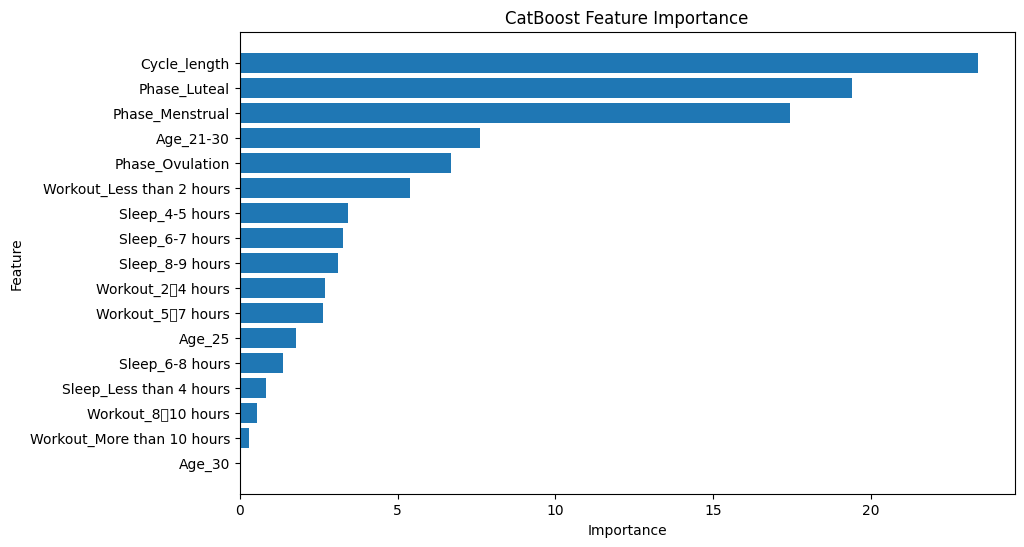

In [35]:
#feature importance

feature_importances = model.get_feature_importance()
feature_names = features.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("CatBoost Feature Importance")
plt.gca().invert_yaxis()
plt.show()


In [29]:
#saving the model
model.save_model("catboost_mood_model.cbm")